In [1]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [2]:
# code here
df = pd.read_csv('https://tinyurl.com/2pfhncqw')

In [3]:
df.pivot_table(index ='verification_status',columns= 'contract_type',values=['rarity_score','last_sale_price'])

last_sale_price           rarity_score           
contract_type               default       own      default        own
verification_status                                                  
approved                   0.005466  0.168499  3296.041909  393.00000
verified                   0.018829  4.178975   125.845700  260.83758

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [4]:
# code here
df  = pd.read_csv("https://tinyurl.com/2r24n45l")

In [5]:
df['Year'] = df.Year.astype(str).apply(lambda x: x[:4]).astype(int)

In [6]:
df['Brand'] = df.Name.str.split(" ").str.get(0)

In [7]:
df.pivot_table(index='Brand',columns='Year',aggfunc={'Miles':'median','Price':'mean'}).round(2)

Miles                                                 \
Year              2009      2010      2011     2012     2013     2014   
Brand                                                                   
Acura              NaN   98825.0   99426.5  48897.0  87766.0  76067.0   
Alfa               NaN       NaN       NaN      NaN      NaN      NaN   
Audi               NaN   75599.0   51654.0  69918.0  60244.0  53433.0   
BMW            75714.0   56282.0   42869.0  51742.0  61447.0  47370.0   
Buick              NaN  100275.0   58752.0  64459.0  53063.0  74566.5   
Cadillac           NaN   65864.0   45191.0  37894.0  66204.0  52386.0   
Chevrolet      44423.0   36905.5   61625.0  67060.0  65641.0  66644.0   
Chrysler           NaN   63576.0   71322.0  69767.0  61238.5  73182.0   
Dodge              NaN   80408.0       NaN  42977.0  95419.0  73439.0   
FIAT               NaN       NaN       NaN  66963.0  49532.0  21077.0   
Ford           68521.0   58993.0   68594.0  53479.0  75009.0  64940.0   
GMC                NaN       NaN       NaN  85128.0  86850.0  79522.0   
Genesis            NaN       NaN       NaN      NaN      NaN      NaN   
Honda          47335.5   77277.0   74102.0  74199.0  68825.5  66197.0   
Hyundai            NaN   51793.0   73536.0  67040.0  74253.0  69722.0   
INFINITI       86506.0   36661.0   94863.5  63927.0  64261.0  67921.0   
Jaguar             NaN       NaN   38407.0      NaN  16879.0  37850.0   
Jeep           29553.0   72475.0   70958.0  73449.0  89211.0  74351.0   
Kia            58503.0   84791.0   90805.0  67160.0  70285.0  68465.0   
Land               NaN       NaN       NaN      NaN  37451.0  70241.0   
Lexus              NaN   91861.0   78708.0  85013.0  86767.0  66975.0   
Lincoln            NaN       NaN   45028.0  58104.0  69324.0  89612.0   
MAZDA          51104.0   86312.0   67800.0  76102.0  76520.0  65456.0   
MINI               NaN   82249.5   59731.0  78371.0  59179.0  62519.0   
Maserati           NaN       NaN       NaN      NaN  26302.0      NaN   
Mercedes-Benz  45043.0   60343.0   61585.5  70256.0  56965.0  47322.0   
Mitsubishi         NaN       NaN   96119.0  47844.0  95016.0  88065.0   
Nissan             NaN   73425.5  102022.0  45206.0  70542.0  63320.0   
Polestar           NaN       NaN       NaN      NaN      NaN      NaN   
Pontiac        25270.0       NaN       NaN      NaN      NaN      NaN   
Porsche            NaN       NaN       NaN      NaN  36374.0  75564.0   
Ram                NaN       NaN       NaN      NaN      NaN  47435.5   
Saturn         71721.0       NaN       NaN      NaN      NaN      NaN   
Scion              NaN       NaN   93216.0  64360.0  85580.0  59543.0   
Subaru         94095.0   93015.0  104277.0  72326.0  69849.0  85011.0   
Tesla              NaN       NaN       NaN      NaN  59453.0  65776.0   
Toyota         70979.0   71999.0   90581.0  74461.0  80161.0  60901.0   
Volkswagen     71001.0   87498.0   81725.5  82738.0  70930.0  66391.0   
Volvo          71463.0   49335.0       NaN  69250.0  41216.0  75166.5   
smart              NaN       NaN       NaN  27966.0  28703.0  34632.5   

                                                                               \
Year               2015     2016     2017     2018     2019     2020     2021   
Brand                                                                           
Acura           58985.0  60396.0  61143.0  32516.0  50959.0  30894.0  10922.0   
Alfa                NaN   7924.0  41128.0  38908.0  20928.0      NaN      NaN   
Audi            72855.0  49208.0  52348.0  49762.0  50169.5  30423.5  11205.0   
BMW             51963.0  51248.0  51233.0  39269.0  36306.0  23171.0  19978.0   
Buick           57976.0  59999.0  46527.0  50702.0  41152.0  36626.0  39884.0   
Cadillac        24000.0  46523.5  36543.0  57116.0  29609.0  41046.0      NaN   
Chevrolet       51070.0  64677.5  39976.0  53355.0  46375.0  50743.0  37527.0   
Chrysler        73320.0  47475.0  86434.0  64685.5  65963.0  48960.

<AxesSubplot:ylabel='Density'>

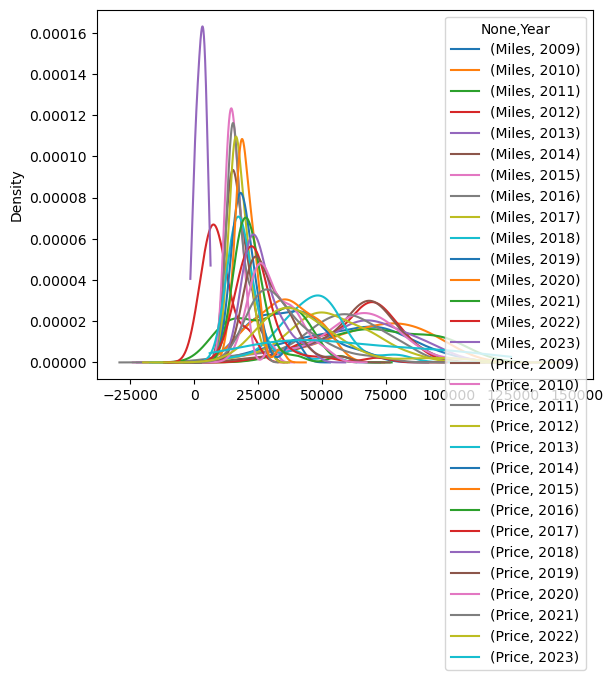

In [8]:
df.pivot_table(index='Brand',columns='Year',aggfunc={'Miles':'median','Price':'mean'}).round(2).plot(kind='kde')

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [9]:
# code here
df = pd.read_csv('https://tinyurl.com/2nq6kugt')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345273 entries, 0 to 345272
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Dates                             345273 non-null  object 
 1   Power Station                     345273 non-null  object 
 2   Monitored Cap.(MW)                345273 non-null  float64
 3   Total Cap. Under Maintenace (MW)  345273 non-null  float64
 4   Planned Maintanence (MW)          345273 non-null  float64
 5   Forced Maintanence(MW)            345273 non-null  float64
 6   Other Reasons (MW)                345273 non-null  int64  
 7   Programme or Expected(MU)         345273 non-null  int64  
 8   Actual(MU)                        345273 non-null  int64  
 9   Excess(+) / Shortfall (-)         345273 non-null  float64
 10  Deviation                         345273 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 29.

In [11]:
df.columns

Index(['Dates', 'Power Station', 'Monitored Cap.(MW)',
       'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)',
       'Forced Maintanence(MW)', 'Other Reasons (MW)',
       'Programme or Expected(MU)', 'Actual(MU)', 'Excess(+) / Shortfall (-)',
       'Deviation'],
      dtype='object')

In [12]:
df[['Actual(MU)','Excess(+) / Shortfall (-)']]

Actual(MU)  Excess(+) / Shortfall (-)
0               18                       5.00
1                7                     -21.80
2               46                       5.63
3               23                       9.43
4               17                     -21.69
...            ...                        ...
345268           1                       0.29
345269          12                      -1.59
345270           0                      -0.72
345271          11                       4.45
345272          13                       1.80

[345273 rows x 2 columns]

In [13]:
df['required']=(df['Actual(MU)'] - (df['Excess(+) / Shortfall (-)']))

In [14]:
df.Dates = pd.to_datetime(df.Dates)

In [15]:
df = df.sort_values('Dates').reset_index(drop=True)

In [16]:
df['month']  = df.Dates.dt.month_name()

In [17]:
df['Power Station'].value_counts()[:10]

NTPC Ltd.    9570
NPCIL        5742
NHPC         5742
GMR ENERG    5742
APL          3828
NLC          3828
TATA PCL     3828
JPPVL        3828
JSWEL        3828
IBPIL        3828
Name: Power Station, dtype: int64

In [18]:
df.pivot_table(index='Power Station',columns='month')

C:\Users\tejas\AppData\Local\Temp\ipykernel_6628\3796011190.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index='Power Station',columns='month')


Actual(MU)                                              \
month              April     August   December   February    January   
Power Station                                                          
0                    NaN        NaN        NaN        NaN        NaN   
ABAN POWR       0.600000   0.780645   0.858757   0.843972   0.870968   
ACB             4.225000   3.812903   4.265537   4.397163   3.754839   
ACPL            0.000000   0.000000   0.000000   0.000000   0.000000   
ADHPL           0.608333   3.761290   0.000000   0.000000   0.000000   
...                  ...        ...        ...        ...        ...   
VESPL           0.000000   0.000000   0.000000   0.000000   0.000000   
VIP             1.466667   1.006452   3.451977   1.191489   2.561290   
VVL             0.000000   0.000000   0.000000   0.000000   0.000000   
WPCL           35.133333  31.354839  27.271186  26.808511  26.787097   
West Bengal    90.808333  73.116129  78.322034  82.971631  79.883871   

                                                                      \
month               July       June      March        May   November   
Power Station                                                          
0                    NaN        NaN        NaN        NaN        NaN   
ABAN POWR       1.058442   0.886667   1.130841   0.798387   0.821229   
ACB             4.175325   4.600000   4.654206   4.290323   4.480447   
ACPL            0.000000   0.000000   0.000000   0.000000   0.000000   
ADHPL           4.194805   2.633333   0.051402   1.298387   0.011173   
...                  ...        ...        ...        ...        ...   
VESPL           0.000000   0.000000   0.000000   0.000000   0.000000   
VIP             1.389610   1.353333   1.485981   1.491935   3.083799   
VVL             0.000000   0.000000   0.000000   0.000000   0.000000   
WPCL           29.779221  25.866667  28.355140  33.072581  25.318436   
West Bengal    79.675325  82.673333  84.457944  84.120968  74.983240   

                                    Deviation                             \
month            October  September     April August   December February   
Power Station                                                              
0              14.925000        NaN       NaN    NaN        NaN      NaN   
ABAN POWR       0.945455   0.783333 -4.308917    0.0 -11.299435      0.0   
ACB             4.006061   3.450000  4.888583    0.0  -2.897740      0.0   
ACPL            0.000000   0.000000  0.000000    0.0   0.000000      0.0   
ADHPL           0.945455   2.100000  3.676083    0.0   3.024972      0.0   
...                  ...        ...       ...    ...        ...      ...   
VESPL           0.000000   0.000000  0.000000    0.0   0.000000      0.0   
VIP             3.163636   3.261111  0.000000    0.0   0.000000      0.0   
VVL             0.000000   0.000000  0.000000    0.0   0.000000      0.0   
WPCL           28.539394  24.116667 -0.649917    0.0   1.186893      0.0   
West Bengal    79.259459  76.400000 -0.407917    0.0   4.007740      0.0   

                                                                             \
month         January July June     March  May   November October September   
Power Station                                                                 
0                 NaN  NaN  NaN       NaN  NaN        NaN     0.0       NaN   
ABAN POWR         0.0  0.0  0.0 -0.275421  0.0 -10.055866     0.0       0.0   
ACB               0.0  0.0  0.0  0.140935  0.0  -3.862905     0.0       0.0   
ACPL              0.0  0.0  0.0  0.000000  0.0   0.000000     0.0       0.0   
ADHPL             0.0  0.0  0.0  0.551168  0.0   1.784469     0.0       0.0   
...               ...  ...  ...       ...  ...        ...     ...       ...   
VESPL             0.0  0.0  0.0  0.000000  0.0   0.000000     0.0       0.0   
VIP               0.0  0.0  0.0  0.000000  0.0   0.000000     0.0       0.0   
VVL               0.0  0.0  0.0  0.000000  0.0   0.000000     

C:\Users\tejas\AppData\Local\Temp\ipykernel_6628\3718371534.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index='Power Station',columns='month').plot()


<AxesSubplot:xlabel='Power Station'>

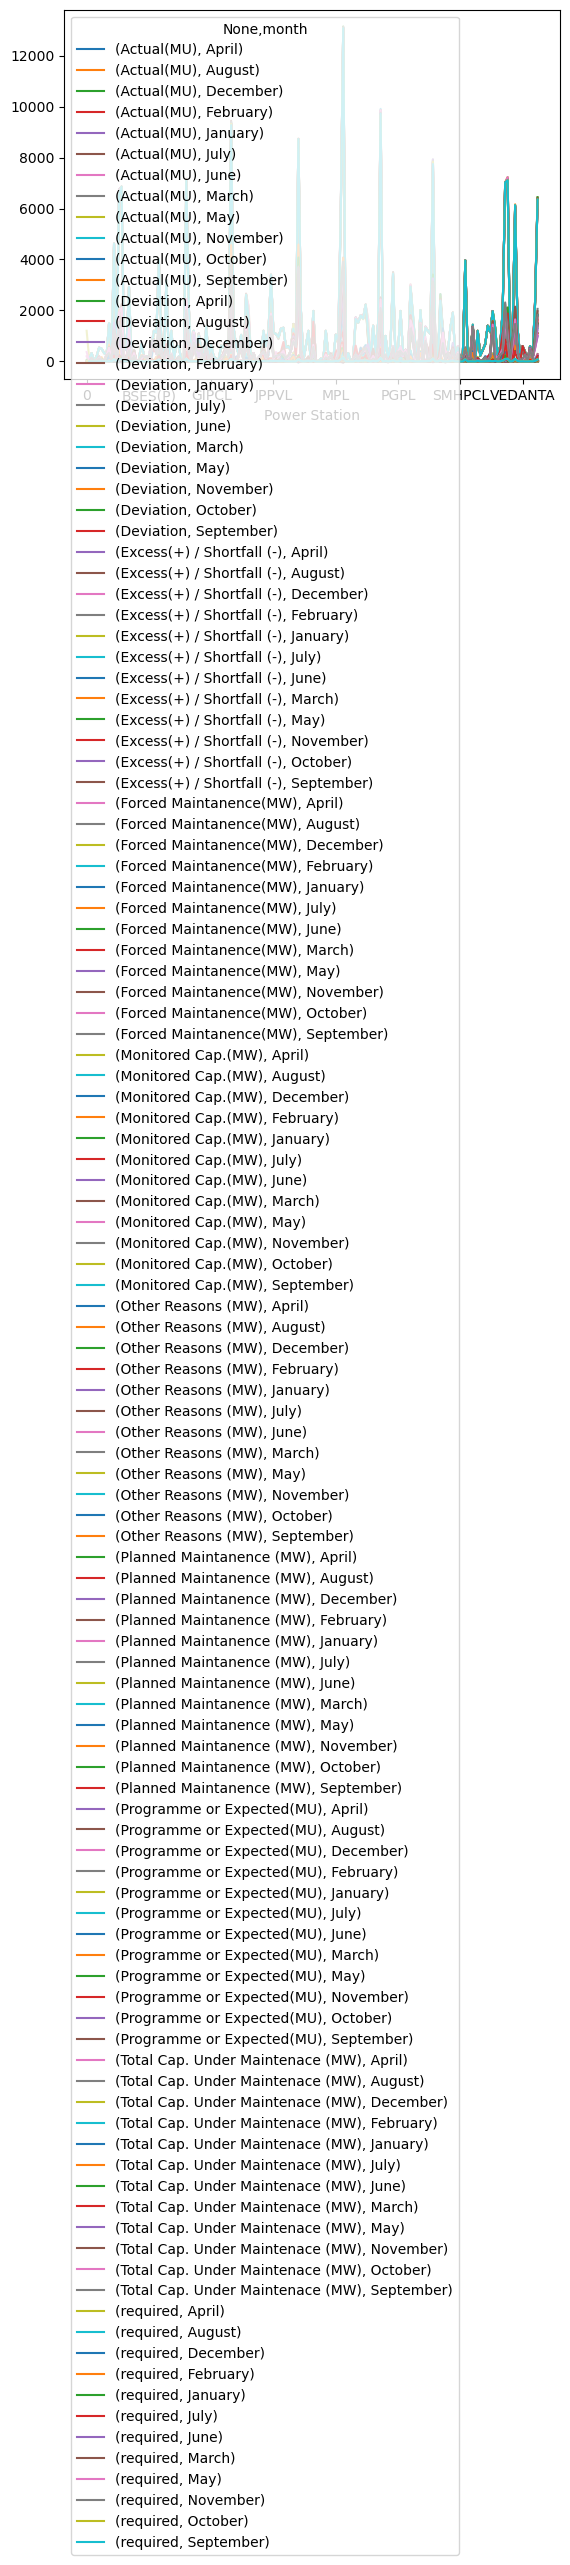

In [19]:
df.pivot_table(index='Power Station',columns='month').plot()

###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [20]:
# code here
#df = pd.read_csv("https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link")

In [182]:
df = pd.read_csv('question-answer.csv',index_col='Unnamed: 0')

In [183]:
df.shape

(20, 1)

In [184]:
q = df[df['2'].str.startswith('Q')].reset_index(drop=True).rename(columns={'2':'question'})

In [185]:
a = df[df['2'].str.startswith('A')].reset_index(drop=True).rename(columns={'2':'answers'})

In [186]:
final = pd.concat([q,a],axis=1)

###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [194]:
final[~final.question.str.endswith('?')]

Empty DataFrame
Columns: [question, answers]
Index: []

In [188]:
# code here
final[~final.question.str.endswith("?")]

Empty DataFrame
Columns: [question, answers]
Index: []

###`Q 6-10` LOG and EMPLOYEE 
6. Show `activity` details month wise. Show count for each `activity` 
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [195]:
# code here
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

In [196]:
log_file.columns

Index(['Log_ID', 'dt', 'dept', 'emp_id', 'activity', 'eqpt'], dtype='object')

In [197]:
df = employee.merge(log_file,left_on='EMPLOYEE_ID',right_on='emp_id').drop(['EMPLOYEE_ID','emp_id'],axis=1)

In [198]:
df.dt = pd.to_datetime(df.dt)

In [199]:
df['month'] = df.dt.dt.month_name()

In [200]:
activity_month_log = df.pivot_table(index='activity',columns='month',aggfunc={'Log_ID':'count'})

In [201]:
#6
activity_month_log

Log_ID                                                       \
month       April August December February January July June March May   
activity                                                                 
Checking        3      7        5        4       6    5    4     6   4   
Cleaning        9      9        4        6       9    5    5     4   7   
Inspection      7      9        7        4       7   10    8     4   6   
Repair          2      4        5       10       5    2    9    12   8   

                                       
month      November October September  
activity                               
Checking          6      11         8  
Cleaning          9       3         2  
Inspection        4       5        10  
Repair            6       5         5

In [202]:
temp = df.pivot_table(index=['FIRST_NAME'],columns='month',aggfunc={'Log_ID':'count'})

In [203]:
#7
temp.loc[:,('Log_ID','January')].sort_values(ascending=False).index[0]

'Payam'

In [204]:
df['day'] = df.dt.dt.day_name()

In [205]:
df

FIRST_NAME LAST_NAME   EMAIL  Log_ID         dt   dept    activity  \
0       Steven      King   SKING    1116 2022-05-03  Dept2    Checking   
1       Steven      King   SKING    1139 2022-05-26  Dept2    Cleaning   
2       Steven      King   SKING    1181 2022-07-07  Dept6    Cleaning   
3       Steven      King   SKING    1191 2022-07-17  Dept4    Cleaning   
4       Steven      King   SKING    1269 2022-10-03  Dept6      Repair   
..         ...       ...     ...     ...        ...    ...         ...   
290     Joshua     Patel  JPATEL    1234 2022-08-29  Dept4      Repair   
291     Joshua     Patel  JPATEL    1253 2022-09-17  Dept4    Checking   
292     Joshua     Patel  JPATEL    1281 2022-10-15  Dept4  Inspection   
293     Joshua     Patel  JPATEL    1329 2022-12-02  Dept2    Cleaning   
294     Joshua     Patel  JPATEL    1358 2022-12-31  Dept2    Checking   

       eqpt      month       day  
0       CPU        May   Tuesday  
1       UPS        May  Thursday  
2       CPU       July  Thursday  
3    Server       July    Sunday  
4       UPS    October    Monday  
..      ...        ...       ...  
290     Fan     August    Monday  
291      AC  September  Saturday  
292     CPU    October  Saturday  
293     CPU   December    Friday  
294     Fan   December  Saturday  

[295 rows x 10 columns]

In [206]:
temp = df.pivot_table(index='FIRST_NAME',columns='day',aggfunc={'Log_ID':'count'})

In [207]:
#8
temp[('Log_ID','Saturday')].sort_values(ascending=False)[:3].index

Index(['Joshua', 'Hazel', 'Michael'], dtype='object', name='FIRST_NAME')

In [208]:
#9
df.pivot_table(index='activity',columns='day',aggfunc={'Log_ID':'count'}).drop([('Log_ID','Saturday'),('Log_ID','Sunday')],axis=1).sum(axis=1).sort_values(ascending=False).index[0]

'Inspection'

In [209]:
df.pivot_table(index='activity',columns='day',aggfunc={'Log_ID':'count'}).drop([('Log_ID','Saturday'),('Log_ID','Sunday')],axis=1)

Log_ID                                  
day        Friday Monday Thursday Tuesday Wednesday
activity                                           
Checking        7      9        8      12        13
Cleaning       15      9       14       8         9
Inspection     15     11       14      13         9
Repair          8     12       11      11         9

### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname). 

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [210]:
# code here
df

FIRST_NAME LAST_NAME   EMAIL  Log_ID         dt   dept    activity  \
0       Steven      King   SKING    1116 2022-05-03  Dept2    Checking   
1       Steven      King   SKING    1139 2022-05-26  Dept2    Cleaning   
2       Steven      King   SKING    1181 2022-07-07  Dept6    Cleaning   
3       Steven      King   SKING    1191 2022-07-17  Dept4    Cleaning   
4       Steven      King   SKING    1269 2022-10-03  Dept6      Repair   
..         ...       ...     ...     ...        ...    ...         ...   
290     Joshua     Patel  JPATEL    1234 2022-08-29  Dept4      Repair   
291     Joshua     Patel  JPATEL    1253 2022-09-17  Dept4    Checking   
292     Joshua     Patel  JPATEL    1281 2022-10-15  Dept4  Inspection   
293     Joshua     Patel  JPATEL    1329 2022-12-02  Dept2    Cleaning   
294     Joshua     Patel  JPATEL    1358 2022-12-31  Dept2    Checking   

       eqpt      month       day  
0       CPU        May   Tuesday  
1       UPS        May  Thursday  
2       CPU       July  Thursday  
3    Server       July    Sunday  
4       UPS    October    Monday  
..      ...        ...       ...  
290     Fan     August    Monday  
291      AC  September  Saturday  
292     CPU    October  Saturday  
293     CPU   December    Friday  
294     Fan   December  Saturday  

[295 rows x 10 columns]

In [211]:
df.FIRST_NAME = df.FIRST_NAME.fillna(df.EMAIL.apply(lambda x: x[:2].upper()+x[2:].lower()))

In [224]:
df.EMAIL = df.EMAIL.str[:] + '@CAMPUSX.COM'

In [225]:
df

FIRST_NAME LAST_NAME               EMAIL  Log_ID         dt   dept  \
0       Steven      King   SKING@CAMPUSX.COM    1116 2022-05-03  Dept2   
1       Steven      King   SKING@CAMPUSX.COM    1139 2022-05-26  Dept2   
2       Steven      King   SKING@CAMPUSX.COM    1181 2022-07-07  Dept6   
3       Steven      King   SKING@CAMPUSX.COM    1191 2022-07-17  Dept4   
4       Steven      King   SKING@CAMPUSX.COM    1269 2022-10-03  Dept6   
..         ...       ...                 ...     ...        ...    ...   
290     Joshua     Patel  JPATEL@CAMPUSX.COM    1234 2022-08-29  Dept4   
291     Joshua     Patel  JPATEL@CAMPUSX.COM    1253 2022-09-17  Dept4   
292     Joshua     Patel  JPATEL@CAMPUSX.COM    1281 2022-10-15  Dept4   
293     Joshua     Patel  JPATEL@CAMPUSX.COM    1329 2022-12-02  Dept2   
294     Joshua     Patel  JPATEL@CAMPUSX.COM    1358 2022-12-31  Dept2   

       activity    eqpt      month       day  
0      Checking     CPU        May   Tuesday  
1      Cleaning     UPS        May  Thursday  
2      Cleaning     CPU       July  Thursday  
3      Cleaning  Server       July    Sunday  
4        Repair     UPS    October    Monday  
..          ...     ...        ...       ...  
290      Repair     Fan     August    Monday  
291    Checking      AC  September  Saturday  
292  Inspection     CPU    October  Saturday  
293    Cleaning     CPU   December    Friday  
294    Checking     Fan   December  Saturday  

[295 rows x 10 columns]

In [241]:
temp = df[((df.activity == 'Inspection') | (df.activity == 'Cleaning') | (df.activity == 'Checking'))&(df.FIRST_NAME.str.startswith('A'))]

In [249]:
(temp.FIRST_NAME.str[:] + " " + temp.LAST_NAME.str[:]).value_counts()

Alexander Khoo      5
Alexander Hunold    3
AFripp Fripp        1
dtype: int64